### Performing Hierarchical,Kmeans and DBSCAN for Crime Data Set

## Heirarchial Clustering

In [5]:
# Importing hierarchial clustering libraries

import scipy.cluster.hierarchy as sch # for caluclating distances and creating dendrograms
from sklearn.cluster import AgglomerativeClustering # to cut the tree and form clusters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# read crime dataset into a dataframe using pandas
crimedata = pd.read_csv('crime_data.csv')
crimedata

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


#### Perform Initial EDA

In [53]:
##check for null values
crimedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
# No null values existing in the given dataset

In [54]:
##check for duplicated values
crimedata[crimedata.duplicated()]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


In [55]:
# No duplicated values existing

<AxesSubplot:>

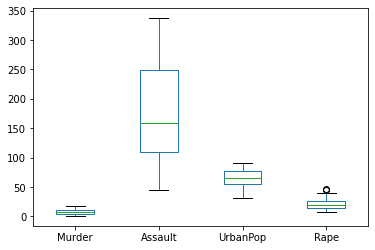

In [56]:
##check for outilers
import matplotlib.pyplot as plt
crimedata.plot(kind='box')

<AxesSubplot:>

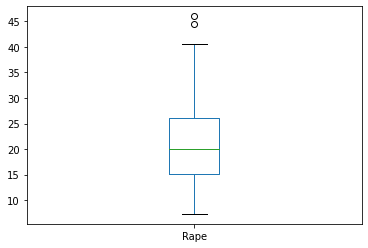

In [57]:
crimedata['Rape'].plot(kind='box')

In [ ]:
# There are 2 outliers existing above the upper fence for the rape variable

In [58]:
crimedata.Rape.describe()

count    50.000000
mean     21.232000
std       9.366385
min       7.300000
25%      15.075000
50%      20.100000
75%      26.175000
max      46.000000
Name: Rape, dtype: float64

In [59]:
def remove_outlier(datset, col_name):
    q1 = datset[col_name].quantile(0.25)
    q3 = datset[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = datset[(datset[col_name] > fence_low) & (datset[col_name] < fence_high)]
    return df_out

In [61]:
crimedata=remove_outlier(crimedata,'Rape')
crimedata

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8
10,Hawaii,5.3,46,83,20.2


<AxesSubplot:>

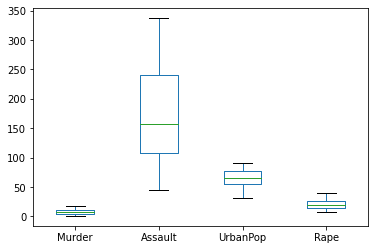

In [62]:
crimedata.plot(kind='box')

In [63]:
# Outliers- 2 records have been removed in the given dataset

In [64]:
# removing Unnamed:0 variable as it is not required for performing clustering
crime = crimedata.iloc[:,1:]
crime.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7


In [65]:
# defining normalization function and standardization function
def norm_func(i):
    x = (i - i.min())/(i.max()-i.min())
    return x
def std_func(i):
    x = (i - i.mean())/(i.std())
    return x

In [69]:
# standardizing the data as there are only numerical values
df_std = std_func(crime)
df_std

,Murder,Assault,UrbanPop,Rape
0,1.265291,0.828552,-0.527331,0.119364
2,0.102591,1.526491,1.002509,1.326867
3,0.262177,0.275014,-1.083636,-0.090101
4,0.307774,1.309889,1.767428,2.509728
5,0.056995,0.443482,0.863432,2.275620
6,-0.991715,-0.687660,0.793894,-1.125104
7,-0.398966,0.852619,0.446203,-0.545995
8,1.766848,2.019861,1.002509,1.437761
9,2.222809,0.527716,-0.388255,0.686151
10,-0.535754,-1.457800,1.211123,-0.003850


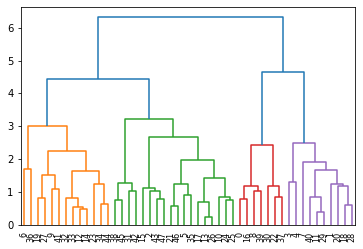

In [70]:
#creating a dendrogram using complete linkage
dendrogram_complete = sch.dendrogram(sch.linkage(df_std,method = 'complete'))

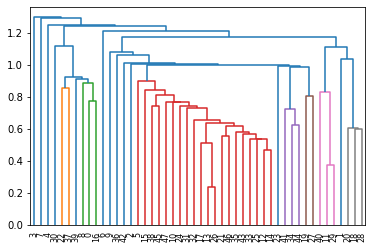

In [71]:
#creating a dendrogram using single linkage
dendrogram_single = sch.dendrogram(sch.linkage(df_std,method = 'single'))

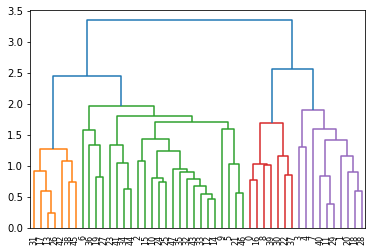

In [72]:
#creating a dendrogram using average linkage
dendrogram_avg = sch.dendrogram(sch.linkage(df_std,method = 'average'))

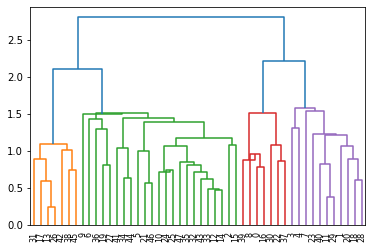

In [73]:
#creating dendrogram using centroid linkage
dendrogram_centroid = sch.dendrogram(sch.linkage(df_std,method ='centroid'))

### As we know that when we are cutting dendrograms we should have balanced clusters

#### from the above all dendrograms we can say complete linkage is having balanced clusters
#### balanced clusters: having equal or mostly equal number of data points in all clusters

In [74]:
# create clusters using complete linkage and euclidian distance metric
hc = AgglomerativeClustering(n_clusters = 4,affinity='euclidean',linkage='complete')
hc
# this is just a skelton of algorithm we havent added our data to this algo

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [75]:
# applying agglomerative clustering to crime data we use fit_predict
y_hc = hc.fit_predict(df_std)
y_hc
# covert into dataframe
clusters = pd.DataFrame(y_hc,columns = ['Clusters'])
clusters

,Clusters
0,2
1,3
2,0
3,3
4,3
5,0
6,1
7,3
8,2
9,1


In [76]:
clusters['Clusters'].value_counts()

0    18
1    13
3    10
2     7
Name: Clusters, dtype: int64

In [79]:
# adding the clusterID's to the original dataset
crimedata['h_clusterID']=y_hc
crimedata

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterID
0,Alabama,13.2,236,58,21.2,2
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,2
10,Hawaii,5.3,46,83,20.2,1


In [80]:
result= crimedata.groupby(crimedata.h_clusterID).mean()
result

,Murder,Assault,UrbanPop,Rape
h_clusterID,,,,
0,4.472222,96.888889,55.500000,13.338889
1,5.738462,143.615385,75.384615,20.492308
2,14.671429,251.285714,54.285714,21.685714
3,10.940000,265.300000,78.900000,31.280000


###### conclusions from heirarchial clustering for crimedata set
###### from the formed 4 clusters we can say that 
###### for clusters 0,1,3 higher the urbanpopulation higher the crime rate
###### Though the mean urban population of cluster 2 less compared to cluster 1 and 3 still the crime rate is high
###### so the areas in this cluster2 can be considered as highly unsafe 
###### cluster 0 ,cluster 1can be considered as unsafe,
###### cluster 3 is highly unsafe

In [84]:
crimedata[crimedata.h_clusterID==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterID
0,Alabama,13.2,236,58,21.2,2
9,Georgia,17.4,211,60,25.8,2
17,Louisiana,15.4,249,66,22.2,2
23,Mississippi,16.1,259,44,17.1,2
32,North Carolina,13.0,337,45,16.1,2
39,South Carolina,14.4,279,48,22.5,2
41,Tennessee,13.2,188,59,26.9,2


## KMeans

In [120]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np


In [8]:
# read crime dataset into a dataframe using pandas
crimedata = pd.read_csv('crime_data.csv')
crimedata

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


#### Perform Initial EDA

In [122]:
##check for null values
crimedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [123]:
crimedata[crimedata.duplicated()]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


In [124]:
# removing Unnamed:0 variable as it is not required for performing clustering
crime = crimedata.iloc[:,1:]
crime.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [125]:
# standardizing the data as there are only numerical values
df_norm = norm_func(crime)
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [126]:
# creating elbow curve for different k values
k = list(range(2,10))
k
TWSS= []# variable for storing total with in sum of squares distance for each kmeans
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    wss = []#variable for storing within sum of squares for each cluster
    for j in range(i):
        wss.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(wss))
print("TWSS VALUE",TWSS)
print("WSS VALUES",wss)

TWSS VALUE [array([16.96661211]), array([14.59566832]), array([12.72623173]), array([11.71740197]), array([11.34881541]), array([10.55275668]), array([10.01093179]), array([9.6191401])]
WSS VALUES [array([0.95849335]), array([2.03423101]), array([1.78284943]), array([0.46351316]), array([0.61901556]), array([1.11022302e-16]), array([2.01646412]), array([0.66780755]), array([1.07676592])]


In [127]:
sum(cdist(df_norm.iloc[kmeans.labels_==0,:],kmeans.cluster_centers_[0].reshape(1,df_norm.shape[1]),"euclidean"))

array([0.95849335])

In [128]:
kmeans.cluster_centers_[0].reshape(1,df_norm.shape[1])

array([[0.24939759, 0.25      , 0.73898305, 0.43152455]])

In [129]:
# for getting cluster centers
(kmeans.cluster_centers_).shape

(9, 4)

[2, 3, 4, 5, 6, 7, 8, 9]


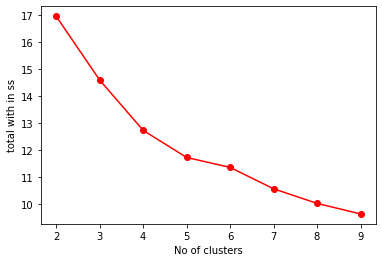

In [130]:
# ploting an elbow graph 
plt.plot(k,TWSS,'ro-');
plt.xlabel("No of clusters");
plt.ylabel("total with in ss")
plt.xticks(k)

# for plot r stands for red color
# o stands for dot and - stands for line
print(k)

### The elbow appear to be smoothening out after four clusters indicating that the optimal number of clusters is 4.

In [131]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters 
Kmeans_clust=KMeans(n_clusters=4)
Kmeans_clust.fit(df_norm)
crimedata['clusterId']=pd.Series(Kmeans_clust.labels_)
crimedata
#pd.Series(Kmeans_clust.labels_)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterId
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


In [132]:
result = crimedata.iloc[:,1:].groupby(crimedata.clusterId).mean()
result

,Murder,Assault,UrbanPop,Rape,clusterId
clusterId,,,,,
0,13.937500,243.625000,53.750000,21.412500,0
1,5.852941,141.176471,73.647059,19.335294,1
2,3.600000,78.538462,52.076923,12.176923,2
3,10.966667,264.000000,76.500000,33.608333,3


###### Conclusions 
###### tha clusters formed using hierarchial and kmeans are mostly similar
###### this clusthers can be categorized t safe and unsafe are similar to heirarchial
###### cluster 2 can be considered as littlesafe as there is less urbon population and less crimerate
###### areas in Cluster 0 can be considered as highly unsafa beacause though there is low urbon population crime rate is very high
###### cluster 1 little unsafe
###### cluster3 very unsafe

## DBSCAN

In [133]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv('crime_data.csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


### Perform Initial EDA

In [135]:
##check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [136]:
df[df.duplicated()]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


<AxesSubplot:>

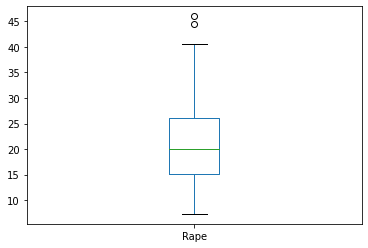

In [137]:
##check for outilers
df.Rape.plot(kind = 'box')

In [138]:
def remove_outlier(datset, col_name):
    q1 = datset[col_name].quantile(0.25)
    q3 = datset[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = datset[(datset[col_name] > fence_low) & (datset[col_name] < fence_high)]
    return df_out

In [139]:
df=remove_outlier(df,'Rape')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8
10,Hawaii,5.3,46,83,20.2


In [140]:
# removing Unnamed:0 variable as it is not required for performing clustering
df = df.iloc[:,1:]
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7


In [141]:
array=df.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
       [  2.1,  57. ,  56. ,   9.5],
 

In [142]:
# normalizing the data using sklearn.standard scalar
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [143]:
X

array([[ 1.27868078,  0.83731972, -0.53291148,  0.12062732],
       [ 0.10367682,  1.54264441,  1.01311744,  1.34090882],
       [ 0.26495187,  0.27792428, -1.09510382, -0.09105417],
       [ 0.31103046,  1.32375054,  1.7861319 ,  2.53628661],
       [ 0.05759823,  0.44817506,  0.87256935,  2.29970142],
       [-1.00220926, -0.69493736,  0.80229531, -1.13700974],
       [-0.40318763,  0.86164126,  0.4509251 , -0.55177269],
       [ 1.78554524,  2.041236  ,  1.01311744,  1.45297549],
       [ 2.24633111,  0.53330046, -0.3923634 ,  0.69341251],
       [-0.5414234 , -1.47322668,  1.22393956, -0.0038912 ],
       [-1.16348432, -0.57332966, -0.81400765, -0.75100233],
       [ 0.63358057,  0.99540974,  1.22393956,  0.46927917],
       [-0.10367682, -0.65845505, -0.04099319,  0.09572361],
       [-1.25564149, -1.35161897, -0.60318553, -1.11210604],
       [-0.38014834, -0.63413351,  0.02928085, -0.27783195],
       [ 0.47230552, -0.70709814, -0.95455574, -0.48951343],
       [ 1.78554524,  0.

##### Calculating the best epsilon value- to be taken for the DBSCAN model

In [144]:
#Importing required libraires for finding best epsilon
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [145]:
# Using NearestNeighbours to calculate the average distance between each point and its n minimum points neighbors.
# As no. of dimensions are 4 minpoints can be taken as 2*D = 2*4 =8
neighbors = NearestNeighbors(n_neighbors=8)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

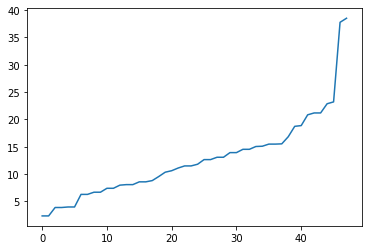

In [146]:
#Sort distance values by ascending value and plot
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

###### For the data set, the sorted distances produces a k-distance elbow plot,from the plot we get 
###### The ideal value for ε will be equal to the distance value at the “crook of the elbow”, or the point of maximum curvature

In [149]:
dbscan = DBSCAN(eps=4.4, min_samples=8)
dbscan.fit(X)

DBSCAN(eps=4.4, min_samples=8)

In [150]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [151]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [152]:
df=pd.concat([df,cl],axis=1)

In [153]:
result = df.groupby(df.cluster).mean()
result

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0.0,7.778261,169.76087,65.695652,20.536957


In [154]:
## from DBScan we can conclude no noise data existing